In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Load data
df = pd.read_csv("2022 School Absenteeism v2.csv")

In [10]:
# Data exploration
print(df.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SchoolID                     114 non-null    int64  
 1   SchoolID_n                   114 non-null    int64  
 2   SchoolName                   114 non-null    object 
 3   Year                         114 non-null    int64  
 4   cl_pressure                  114 non-null    float64
 5   cl_engage                    114 non-null    float64
 6   cl_safety                    114 non-null    float64
 7   cl_voice                     114 non-null    float64
 8   cl_belonging                 114 non-null    float64
 9   cl_bullying                  114 non-null    float64
 10  cl_ss_relationship           114 non-null    float64
 11  cl_inclusive                 114 non-null    float64
 12  cl_diversity                 114 non-null    float64
 13  cl_manage           

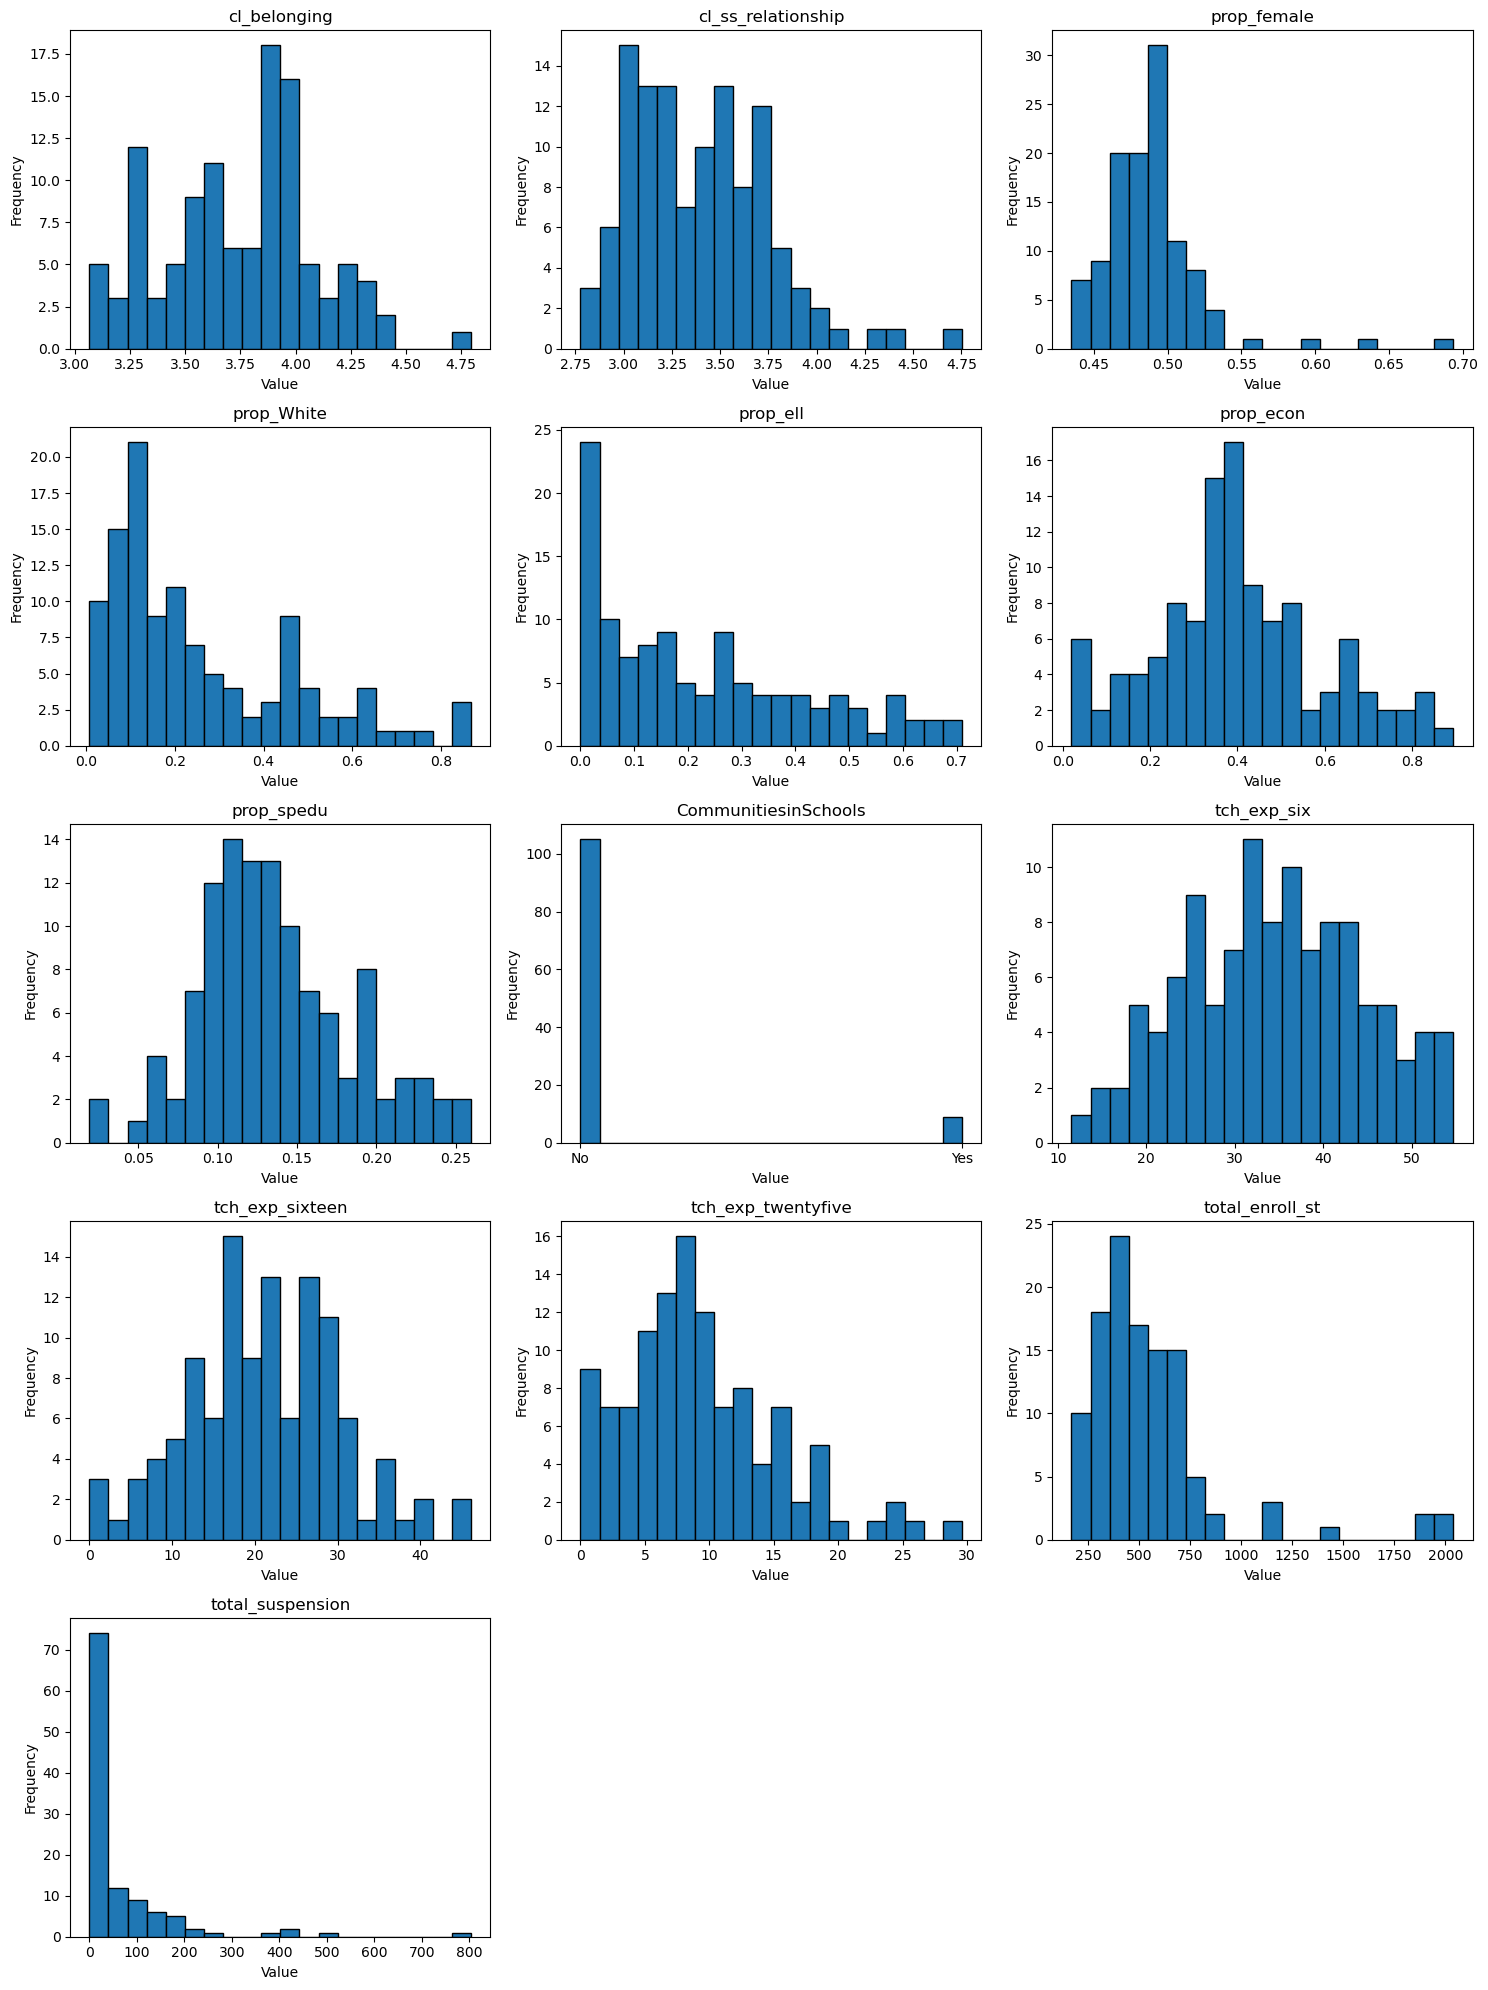

In [18]:
# Histograms 
selected_columns = [
    "cl_belonging", "cl_ss_relationship",
    "prop_female", "prop_White", "prop_ell",
    "prop_econ", "prop_spedu",
    "CommunitiesinSchools",
    "tch_exp_six", "tch_exp_sixteen", "tch_exp_twentyfive",
    "total_enroll_st", "total_suspension"
]

# Set up grid
n_cols = 3
n_rows = int(np.ceil(len(selected_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(selected_columns):
    axes[i].hist(df[col], bins=20, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Turn off any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


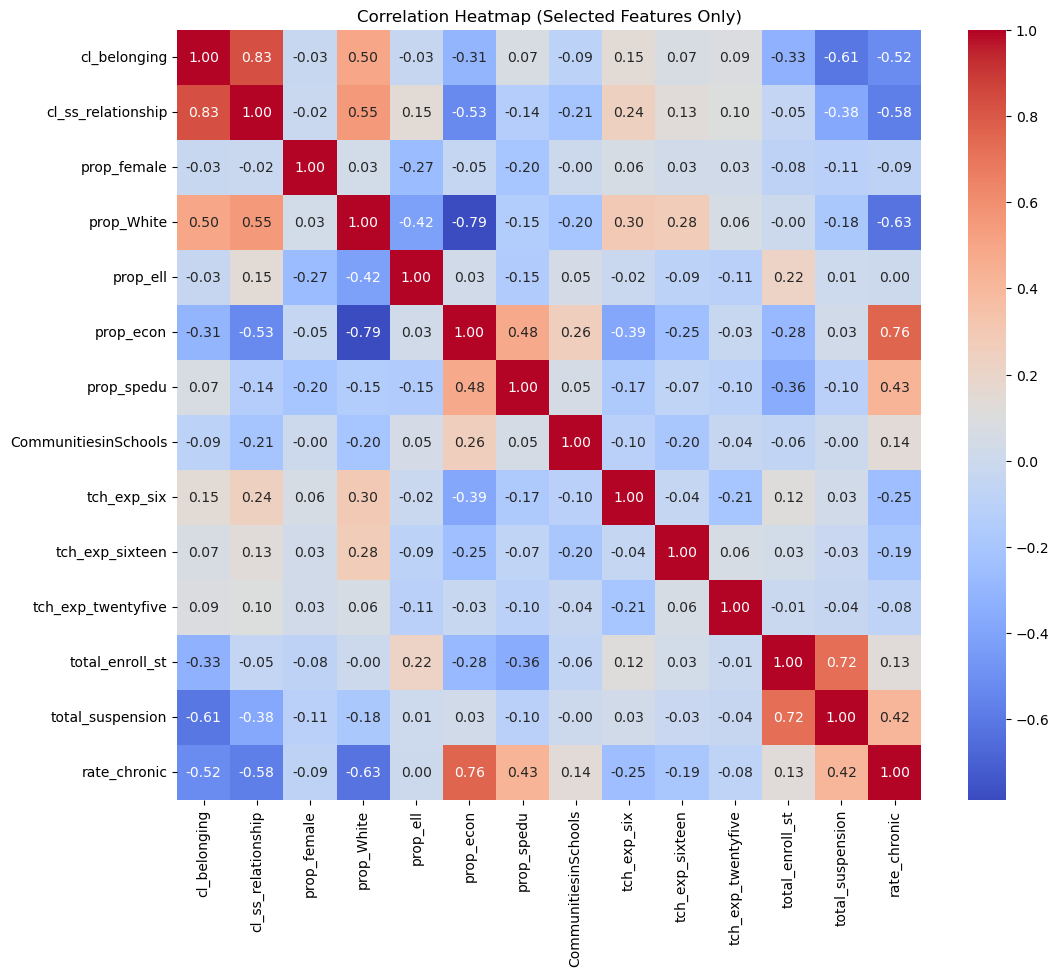

In [28]:
# Correlation heatmap
df_selected = df[[
    "cl_belonging", "cl_ss_relationship",
    "prop_female", "prop_White", "prop_ell",
    "prop_econ", "prop_spedu",
    "CommunitiesinSchools",  # this will be fixed below
    "tch_exp_six", "tch_exp_sixteen", "tch_exp_twentyfive",
    "total_enroll_st", "total_suspension",
    "rate_chronic"
]].copy()

# Convert 'CommunitiesinSchools' from Yes/No to 1/0
df_selected["CommunitiesinSchools"] = df_selected["CommunitiesinSchools"].map({"Yes": 1, "No": 0})

plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Selected Features Only)")
plt.show()

In [36]:
# Define features and target of interest
df["CommunitiesinSchools"] = df["CommunitiesinSchools"].map({"Yes": 1, "No": 0})

selected_columns = [
    "cl_belonging", "cl_ss_relationship",
    "prop_female", "prop_White", "prop_ell",
    "prop_econ", "prop_spedu",
    "CommunitiesinSchools",
    "tch_exp_six", "tch_exp_sixteen", "tch_exp_twentyfive",
    "total_enroll_st", "total_suspension"
]

X = df[selected_columns]
y = df["rate_chronic"]

In [44]:
# Split train/test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

In [46]:
# Random forest 
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Evaluation
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Root Mean Squared Error (RMSE): 0.07
R-squared (R²): 0.59


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


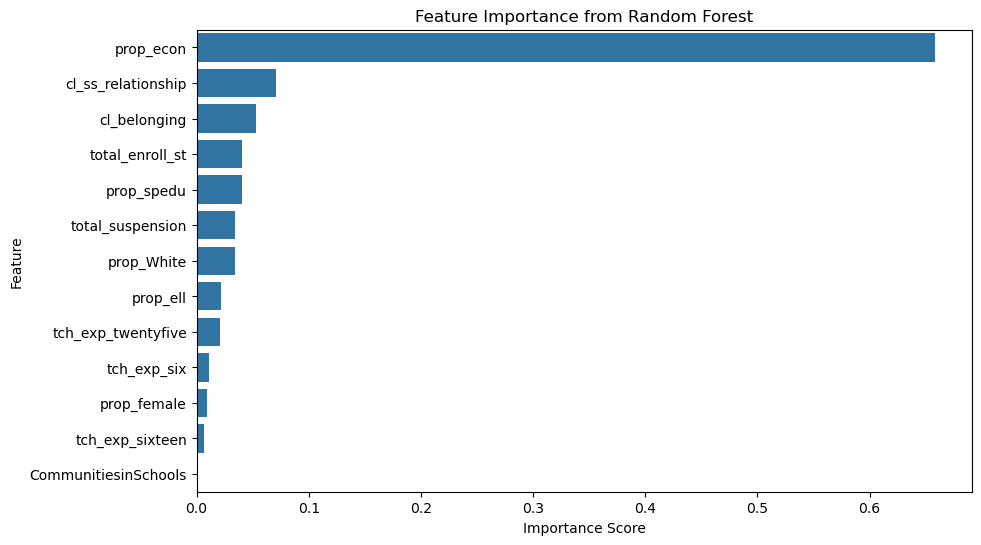

Top Predictors of Chronic Absenteeism:
               feature  importance
5            prop_econ    0.658056
1   cl_ss_relationship    0.070439
0         cl_belonging    0.052501
11     total_enroll_st    0.040782
6           prop_spedu    0.040180


In [50]:
# What school characteristics are strong predictors of chronic absenteeism rates?
feature_importances = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x="importance", y="feature")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Print top features
print("Top Predictors of Chronic Absenteeism:")
print(feature_importances.head())